CSE-221710313024-Kommera Shresta

### Human resource Employee Attrition 

Analyze employee attrition. Find out why employees are leaving the company, and learn to predict who will leave the company. 

## Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

## Data Loading

In [2]:
#Loading the dataset
data = pd.read_csv("HR_Attrition.csv")
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Dimensions of data

In [3]:
#checking dimensions of data
print(data.shape)

(14999, 10)


In [4]:
#checking first n rows
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#checking the data(left)
left = data.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Statistical summary of Data

In [6]:
#summary of statistics
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
#checking value counts(left)
data.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [8]:
#checking list of columns in dataset
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments', 'salary'],
      dtype='object')

In [9]:
#checking for unique values
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Departments               10
salary                     3
dtype: int64

### Checking Null Values

In [10]:
#checking if any null values are present
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [11]:
#checking top n rows 
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis

### Data visualization

0    11428
1     3571
Name: left, dtype: int64

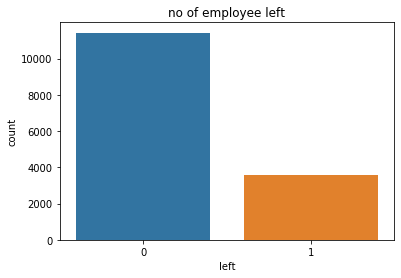

In [12]:
#Visualizing no of  employee left by plotting
sns.countplot(data.left).set_title('no of employee left')
data['left'].value_counts()

we will check the total number of employee left company.We can observe 3571 left the company.

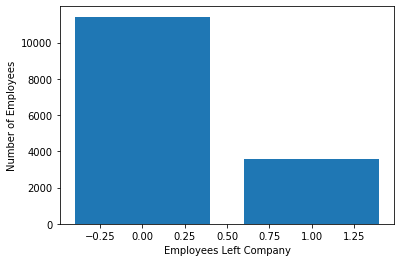

In [13]:
#We are using some plots to visualize the data and perform operations
#Visualize the employee left
#we are plotting employee left company on x axis vs no of employee on y axis
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In this plot, we will visualize the number of employee left company.And we can observe no of employee left is 23 % of the total employment.

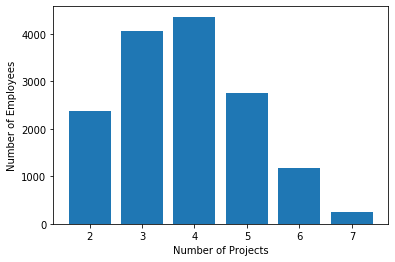

In [14]:
#Visualize the No of projects
#we are plotting number of projects on x axis vs no of employee on y axis
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

In this plot, we will visualize the number of projects done.And we can observe that most of the employee is doing the project from 3-5.

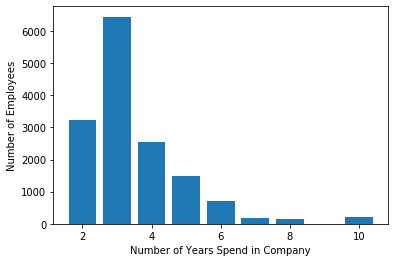

In [15]:
#Visualize the No Of Years spend in company
#we are plotting  No Of Years spend in company on x axis vs no of employee on y axis
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

In this plot, we will visualize the number of  Years spend in company.And we can observe that Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

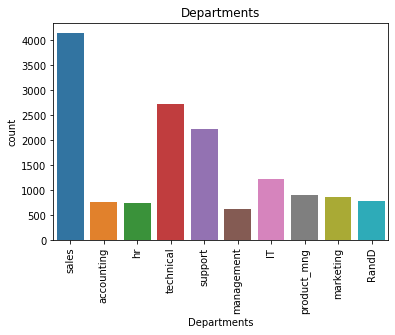

In [16]:
#Visualizing departments by plotting
sns.countplot(data.Departments).set_title('Departments')
data['Departments'].value_counts()
plt.xticks(rotation=90)

In this plot, we will visualize the sales department is having maximum no.of employee followed by technical and support

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

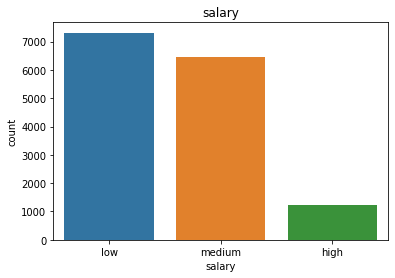

In [17]:
#Visualizing no of employee salary by plotting
sns.countplot(data.salary).set_title('salary')
data['salary'].value_counts()

In this plot, we will visualize the number of employee salary.And we can observe that,the employees are getting salary either medium or low.

##### Correlation

In [18]:
#correlation matrix plot for dataset
corelation = data.corr()

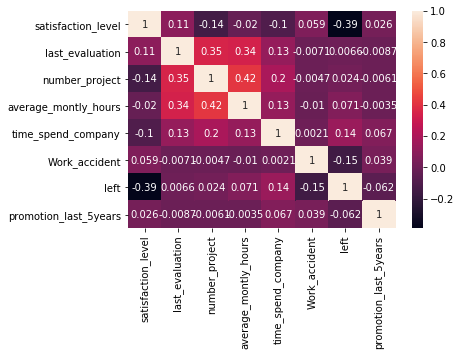

In [19]:
# Visualizing through heatmap
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

The strength of the relationship can be determined by using the correlation 

###  Label encoder 

In [20]:
#applying value counts for salary
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [21]:
#applying value counts for departments
data['Departments'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Departments, dtype: int64

In [22]:
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
data['salary']=le.fit_transform(data['salary'])
data['Departments']=le.fit_transform(data['Departments'])

In [23]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


## Train_test_split

In [24]:
#checking each attributes data type
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Departments                int32
salary                     int32
dtype: object

In [25]:
#separating input and output data
X=data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments', 'salary']]
y=data['left']

In [26]:
#input and output into training data and testing data
#Training--> we will be training the model on training data
#Testing--> check the performance of the model

In [27]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  # 67% training and 33% test

In [28]:
#printing values
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10049, 9)
(4950, 9)
(10049,)
(4950,)


In [29]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
10804,0.66,0.65,3,196,3,1,0,9,1
13984,0.93,0.50,5,272,3,0,0,7,1
7971,0.80,0.77,5,256,2,0,0,9,1
6177,0.72,0.58,4,255,2,0,0,1,0
10085,0.15,0.80,5,121,5,0,0,7,2
...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0,8,1
13418,0.49,0.65,4,233,7,0,0,7,2
5390,0.66,0.73,5,249,2,0,0,8,2
860,0.79,1.00,4,218,5,0,0,7,1


In [30]:
X_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
6723,0.65,0.96,5,226,2,1,0,5,2
6473,0.88,0.80,3,166,2,0,0,0,1
4679,0.69,0.98,3,214,2,0,0,7,1
862,0.41,0.47,2,154,3,0,0,7,1
7286,0.87,0.76,5,254,2,1,0,3,1
...,...,...,...,...,...,...,...,...,...
6889,0.71,0.93,3,287,5,0,0,7,2
9187,0.90,0.55,4,211,3,0,0,2,2
13352,0.87,0.55,4,197,3,0,0,9,0
655,0.77,1.00,4,232,5,0,0,9,2


In [31]:
y_train

10804    0
13984    0
7971     0
6177     0
10085    0
        ..
5191     0
13418    0
5390     0
860      1
7270     0
Name: left, Length: 10049, dtype: int64

In [32]:
y_test

6723     0
6473     0
4679     0
862      1
7286     0
        ..
6889     0
9187     0
13352    0
655      1
14273    1
Name: left, Length: 4950, dtype: int64

## Logistic Regression

In [33]:
## Import Logistic Regression
from sklearn.linear_model import LogisticRegression
# creating an object for Logistic Regression
Lr=LogisticRegression()

In [34]:
# input and output will be passes to the fit method
Lr.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# predicting on train data
y_train_pred_lr = Lr.predict(X_train)
y_train_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

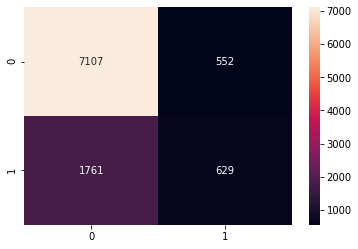

In [36]:
# compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_train,y_train_pred_lr),annot=True,fmt='3.0f')

In [37]:
#printing classification report
print(classification_report(y_train,y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7659
           1       0.53      0.26      0.35      2390

    accuracy                           0.77     10049
   macro avg       0.67      0.60      0.61     10049
weighted avg       0.74      0.77      0.74     10049



In [38]:
#accuracy score for train
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred_lr)

0.769827843566524

In [39]:
#f1 score for train
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred_lr)

0.35228227387286476

In [40]:
# input and output will be passes to the fit method
Lr.fit(X_test, y_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
#predicting on test data
y_test_pred_lr = Lr.predict(X_test)
y_test_pred_lr

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

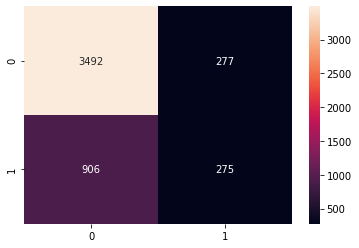

In [42]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_test,y_test_pred_lr),annot=True,fmt='3.0f')

In [43]:
#printing classification report
print(classification_report(y_test,y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      3769
           1       0.50      0.23      0.32      1181

    accuracy                           0.76      4950
   macro avg       0.65      0.58      0.59      4950
weighted avg       0.72      0.76      0.73      4950



In [44]:
#accuracy score for test 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred_lr)

0.761010101010101

In [45]:
#f1 score for test
from sklearn import metrics
f1_score_lr=metrics.f1_score(y_test, y_test_pred_lr)
f1_score_lr

0.3173687247547606

In [46]:
#accuracy score for logistic regression
Lr_score = (accuracy_score(y_test,y_test_pred_lr))*100
Lr_score

76.1010101010101

##### ROC_AUC Curve

In [47]:
#importing and plotting roc_auc curve
from sklearn.metrics import roc_auc_score,roc_curve
m_prob1 = Lr.predict_proba(X_test)[:,1]
fp2,tp2,threshold1 = roc_curve(y_test,m_prob1,pos_label=1)

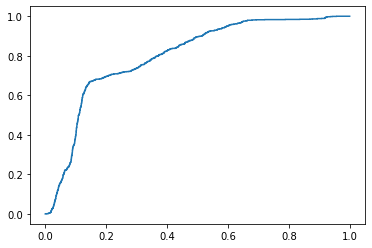

In [48]:
#plotting the curve
plt.plot(fp2,tp2)

## Random Forest Classifier

In [49]:
#Import the RFC from sklearn
from sklearn.ensemble import RandomForestClassifier

# initialize the object for RFC
rfc = RandomForestClassifier()

#fit the RFC to the dataset
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
# predicting on train data
y_train_pred_rfc = rfc.predict(X_train)
y_train_pred_rfc

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

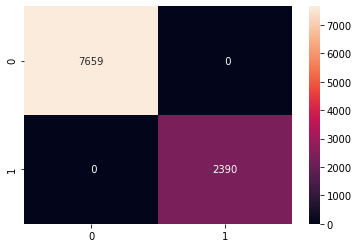

In [51]:
# compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_train,y_train_pred_rfc),annot=True,fmt='3.0f')

In [52]:
#printing classification report
print(classification_report(y_train,y_train_pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7659
           1       1.00      1.00      1.00      2390

    accuracy                           1.00     10049
   macro avg       1.00      1.00      1.00     10049
weighted avg       1.00      1.00      1.00     10049



In [53]:
#accuracy score for train
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred_rfc)

1.0

In [54]:
#f1 score for train
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred_rfc)

1.0

In [55]:
#Predict the response for test dataset
y_test_pred_rfc = rfc.predict(X_test)
y_test_pred_rfc

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

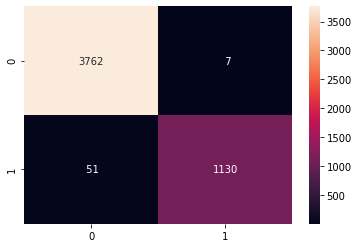

In [56]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_test,y_test_pred_rfc),annot=True,fmt='3.0f')

In [57]:
#printing classification report
print(classification_report(y_test,y_test_pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3769
           1       0.99      0.96      0.97      1181

    accuracy                           0.99      4950
   macro avg       0.99      0.98      0.98      4950
weighted avg       0.99      0.99      0.99      4950



In [58]:
#accuracy score for test
from sklearn.metrics import accuracy_score
rfc_score = (accuracy_score(y_test,y_test_pred_rfc))
rfc_score

0.9882828282828283

In [59]:
#f1 score for test
from sklearn.metrics import f1_score
f1_score_rfc=f1_score(y_test,y_test_pred_rfc)
f1_score_rfc

0.9749784296807593

In [60]:
#accuracy score
rfc_score = (accuracy_score(y_test,y_test_pred_rfc))*100
rfc_score

98.82828282828284

##### ROC_AUC Curve

In [61]:
#importing and plotting roc_auc curve
from sklearn.metrics import roc_auc_score,roc_curve
m_prob1 = rfc.predict_proba(X_test)[:,1]
fp2,tp2,threshold1 = roc_curve(y_test,m_prob1,pos_label=1)

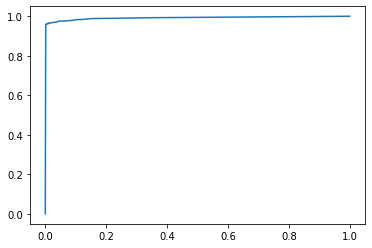

In [62]:
#plotting the curve
plt.plot(fp2,tp2)

## Gradient Boosting

In [63]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [64]:
# predicting on train data
y_train_pred_gb = gb.predict(X_train)
y_train_pred_gb

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

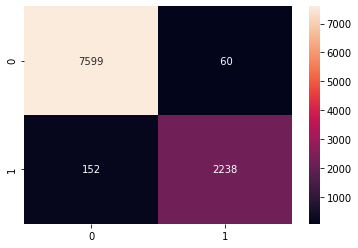

In [65]:
# compare the actual values(y_train) with predicted values(y_train_pred)
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_train,y_train_pred_gb),annot=True,fmt='3.0f')

In [66]:
#printing classification report
print(classification_report(y_train,y_train_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7659
           1       0.97      0.94      0.95      2390

    accuracy                           0.98     10049
   macro avg       0.98      0.96      0.97     10049
weighted avg       0.98      0.98      0.98     10049



In [67]:
#accuracy score for train
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred_gb)

0.978903373469997

In [68]:
#f1 score for train
from sklearn.metrics import f1_score
f1_score(y_train,y_train_pred_gb)

0.954778156996587

In [69]:
#Predict the response for test dataset
y_test_pred_gb = gb.predict(X_test)
y_test_pred_gb

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

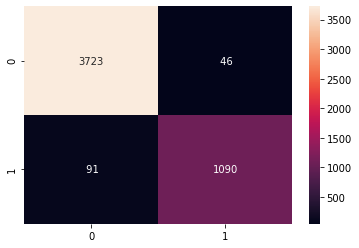

In [70]:
# compare the actual values(y_test) with predicted values(y_test_pred)
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(y_test,y_test_pred_gb),annot=True,fmt='3.0f')

In [71]:
#printing classification report
print(classification_report(y_test,y_test_pred_gb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3769
           1       0.96      0.92      0.94      1181

    accuracy                           0.97      4950
   macro avg       0.97      0.96      0.96      4950
weighted avg       0.97      0.97      0.97      4950



In [72]:
#accuracy score for test
from sklearn.metrics import accuracy_score
gb_score = (accuracy_score(y_test,y_test_pred_gb))
gb_score

0.9723232323232324

In [73]:
#f1 score for test
from sklearn.metrics import f1_score
f1_score_gb=f1_score(y_test,y_test_pred_gb)
f1_score_gb

0.9408718170047474

In [74]:
#accuracy score
gb_score = (accuracy_score(y_test,y_test_pred_gb))*100
gb_score

97.23232323232324

##### ROC_AUC Curve

In [75]:
#importing and plotting roc_auc curve
from sklearn.metrics import roc_auc_score,roc_curve
m_prob1 = gb.predict_proba(X_test)[:,1]
fp2,tp2,threshold1 = roc_curve(y_test,m_prob1,pos_label=1)

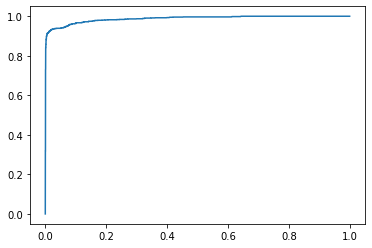

In [76]:
#plotting the curve
plt.plot(fp2,tp2)

### Comparsion plot

#### Comparsion plot of Accuracy scores and f1scores for Logistic Regression,Random forest classifier and Gradient boosting

Text(0, 0.5, 'Accuracy')

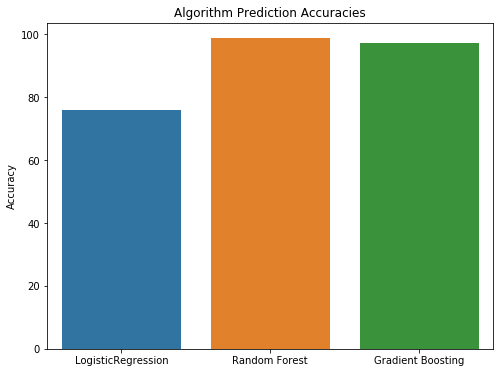

In [77]:
#comparing accuracy scores of Logistic Regression ,Random forest classifier and gradient boosting
Methods = ['LogisticRegression', 'Random Forest','Gradient Boosting']
Scores = np.array([Lr_score,rfc_score,gb_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

In above plot, we plotted accuracy scores of Logistic Regression ,Random forest classifier and gradient boosting .From these plot we can say that accuracy score of Random Forest Classifier is higher than Logistic Regression and Gradient Boosting.So from this observation we can say that Random Forest Classifier is most preferable.

Text(0, 0.5, 'f1 scores')

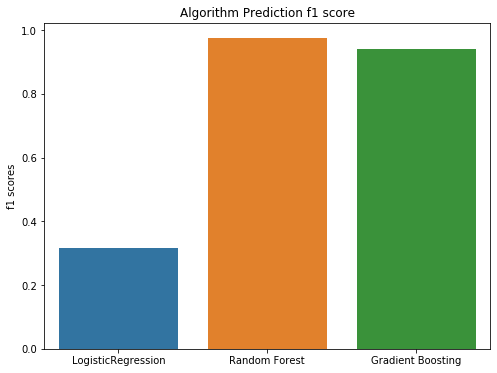

In [78]:
#comparing f1 scores of Logistic Regression ,Random forest classifier and gradient boosting
Methods = ['LogisticRegression', 'Random Forest','Gradient Boosting']
Scores = np.array([f1_score_lr,f1_score_rfc,f1_score_gb])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction f1 score')
plt.ylabel('f1 scores')

In above plot, we plotted f1 scores of Logistic Regression ,Random forest classifier and gradient boosting .From these plot we can say that f1 score of Random Forest Classifier is higher than Logistic Regression and Gradient Boosting.So from this observation we can say that Random Forest Classifier is most preferable.

### GridSearchCV

In [79]:
param_grid = {"n_estimators": [10, 18, 22],
              "max_depth": [3, 5],
              "min_samples_split": [15, 20],
              "min_samples_leaf": [5, 10, 20],
              "max_leaf_nodes": [20, 40],
              "min_weight_fraction_leaf": [0.1]
             }

In [80]:
#Import the GridSearchCV 
from sklearn.model_selection import GridSearchCV

# initialization of GridSearch with the parameters- ModelName and the dictionary of parameters
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

# applying gridsearch onto dataset
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [81]:
#searching for best params
grid_search.best_params_

{'max_depth': 5,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 18}

In [82]:
rfc = RandomForestClassifier(max_depth= 5,
 max_leaf_nodes=20,
 min_samples_leaf=10,
 min_samples_split=15,
 min_weight_fraction_leaf= 0.1,
 n_estimators=18)

# We need to fit the model to the data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=15,
                       min_weight_fraction_leaf=0.1, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
# Prediction on test data
pred_test = rfc.predict(X_test)

#Classification Report of actual values and predicted value(GridSearch)
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3769
           1       0.88      0.53      0.66      1181

    accuracy                           0.87      4950
   macro avg       0.87      0.75      0.79      4950
weighted avg       0.87      0.87      0.86      4950



In [84]:
#accuracy score
rfc_score=(rfc.score(X_test, pred_test))*100
rfc_score

100.0

### Predicting for Attrition For Random Forest Classifier

In [85]:
print(rfc.predict([[0.38,0.53,2,157,3,0,0,7,1]]))

[1]


In [86]:
print(rfc.predict([[0.80,0.86,5,262,6,0,0,7,2]]))

[0]


In [87]:
print(rfc.predict([[0.11,0.88,7,272,4,0,0,7,1]]))

[1]


In [88]:
print(rfc.predict([[0.55,0.96,3,194,4,0,0,6,2]]))

[0]


### Comparsion plot 

#### Comparsion plot of Accuracy scores and f1scores for Logistic Regression,Random forest classifier and gradient boosting After Hyper Parameter Tuning (and GridsearchCV)

Text(0, 0.5, 'Accuracy')

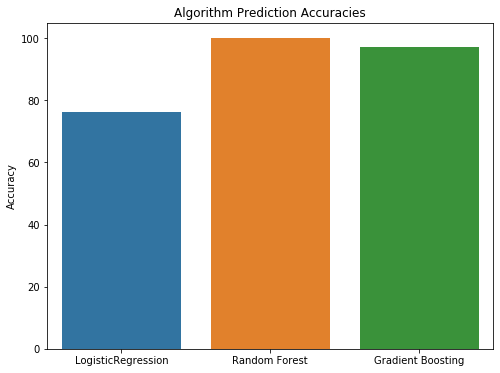

In [89]:
#comparing accuracy scores of Logistic Regression ,Random forest classifier and gradient boosting
Methods = ['LogisticRegression', 'Random Forest','Gradient Boosting']
Scores = np.array([Lr_score,rfc_score,gb_score])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

In above plot, we plotted accuracy scores of Logistic Regression ,Random forest classifier and gradient boosting after hyper parameter tuning (and GridsearchCV)for best model.From these plot we can say that accuracy score of Random Forest Classifier is higher than Logistic Regression and gradient boosting.So from this observation we can say that Random Forest Classifier is most preferable.

Text(0, 0.5, 'Accuracy')

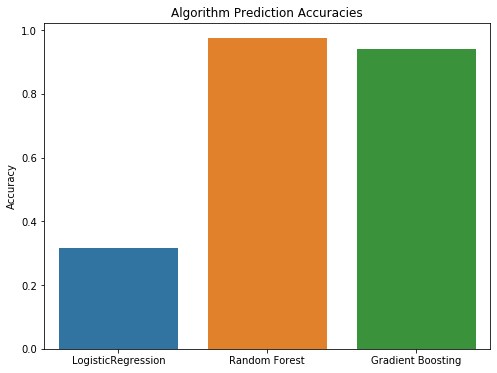

In [90]:
#comparing f1 scores of Logistic Regression ,Random forest classifier and gradient boosting
Methods = ['LogisticRegression', 'Random Forest','Gradient Boosting']
Scores = np.array([f1_score_lr,f1_score_rfc,f1_score_gb])

fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(Methods, Scores)
plt.title('Algorithm Prediction Accuracies')
plt.ylabel('Accuracy')

In above plot, we plotted f1 scores of Logistic Regression ,Random forest classifier and gradient boosting after hyper parameter tuning (and GridsearchCV)for best model.From these plot we can say that f1 score of  Random Forest Classifier is higher than Logistic Regression and gradient boosting.So from this observation we can say that Random Forest Classifier is most preferable.